In [65]:
#REFERENCE(S): https://www.youtube.com/watch?v=eMOA1pPVUc4&t=994s, Stack Overflow

#Importing necessary libraries

import pandas as pd
import os

#Merging 12 months of sales data

df = pd.read_csv("./Downloads/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Downloads/Sales_Data')]

all_months_data = pd.DataFrame()


for file in files:
    df = pd.read_csv("./Downloads/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)


In [8]:
all_data = pd.read_csv("all_data.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [ ]:
# CLEANING SECTION

#Cleaning Step 1: Drop all NaN values

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')







In [ ]:
#Cleaning step 2: Find or and delete it

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']



In [68]:
#Cleaning step 3: Convert columns to correct types

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


In [69]:
#Creating a month column

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity_Ordered,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,1,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,1,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,1,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,1,11.95


QUESTION: Which month was the best month for sales, and how much was earned in that month?

In [70]:
#Creating a Sales column

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity_Ordered,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,1,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,1,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,1,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,1,11.95


In [135]:
#Group the data by monthSales']
results = all_data.groupby('Month').sum()
results.head(13)

/var/folders/9h/954tl1g160x3skhwsr60d5fc0000gn/T/ipykernel_2277/3279094587.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Quantity_Ordered,Sales
Month,,,,
1,10903,1811768.38,10903,1822256.73
2,13449,2188884.72,13449,2202022.42
3,17005,2791207.83,17005,2807100.38
4,20558,3367671.02,20558,3390670.24
5,18667,3135125.13,18667,3152606.75
6,15253,2562025.61,15253,2577802.26
7,16072,2632539.56,16072,2647775.76
8,13448,2230345.42,13448,2244467.88
9,13109,2084992.09,13109,2097560.13


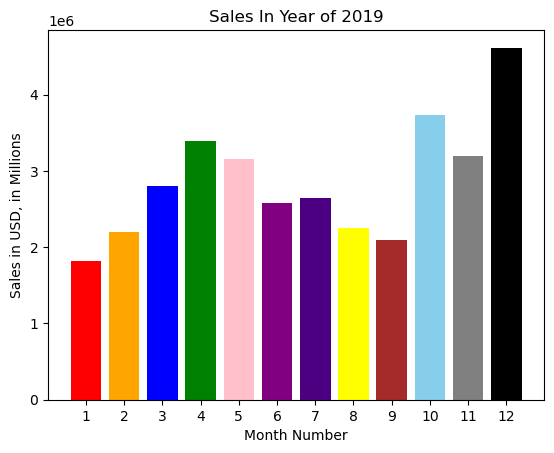

In [136]:
# Visualizing Sales Data by month using Matplotlib library


import matplotlib.pyplot as plt

months = range(1, 13)

colors = ['red', 'orange', 'blue', 'green', 'pink', 'purple', 'indigo', 'yellow', 'brown', 'skyblue', 'grey', 'black']
plt.bar(months, results['Sales'], color=colors)
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD, in Millions')
plt.title('Sales In Year of 2019')
plt.show()

Answer to the question: DECEMBER was the best month for sales, and according to our table, $46 million was earned in that year. These results make sense, because December is the month of Christmas. Many gifts are bought during Christmas.

In [ ]:
QUESTION: What city had the highest number of sales?

In [102]:
#Creating a city and state columns using .apply() method

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')


all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity_Ordered,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,1,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,1,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,1,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,1,11.95,Atlanta (GA)
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12,1,3.84,New York City (NY)
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12,1,11.95,Portland (OR)
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,2,23.90,Dallas (TX)
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12,1,99.99,Dallas (TX)
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",12,4,11.96,Dallas (TX)


In [132]:
#Group the data by the cities

results = all_data.groupby('City').sum()
results.head(10)

/var/folders/9h/954tl1g160x3skhwsr60d5fc0000gn/T/ipykernel_2277/2918672945.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Quantity_Ordered,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,16602,2795498.58
Austin (TX),11153,1809873.61,69829,11153,1819581.75
Boston (MA),22528,3637409.77,141112,22528,3661642.01
Dallas (TX),16730,2752627.82,104620,16730,2767975.40
Los Angeles (CA),33289,5421435.23,208325,33289,5452570.80
New York City (NY),27932,4635370.83,175741,27932,4664317.43
Portland (ME),2750,447189.25,17144,2750,449758.27
Portland (OR),11303,1860558.22,70621,11303,1870732.34
San Francisco (CA),50239,8211461.74,315520,50239,8262203.91


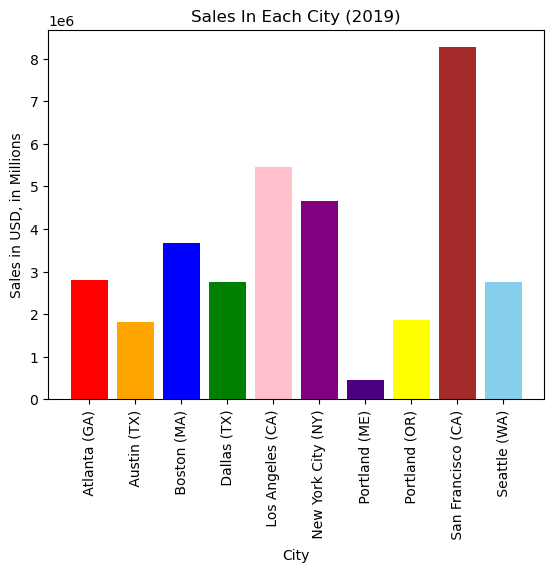

In [133]:
#Visualizing city sales data

import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

colors = ['red', 'orange', 'blue', 'green', 'pink', 'purple', 'indigo', 'yellow', 'brown', 'skyblue']
plt.bar(cities, results['Sales'], color=colors)
plt.xticks(cities, rotation='vertical', size=10)
plt.xlabel('City')
plt.ylabel('Sales in USD, in Millions')
plt.title('Sales In Each City (2019)')
plt.show()

Answer to the question: SAN FRANSISCO was the best city for sales, followed by Los Angeles and New York City.

In [ ]:
QUESTION: What time should advertisements be displayed to maximise liklihood of selling more products?

In [138]:
#Using Datetime module to change format of the Order Date column

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity_Ordered,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,1,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,1,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,1,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,1,11.95,Atlanta (GA)


In [139]:
#Creating an hour and a minute columns

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity_Ordered,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,1,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,1,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,1,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,1,11.95,Atlanta (GA),12,38


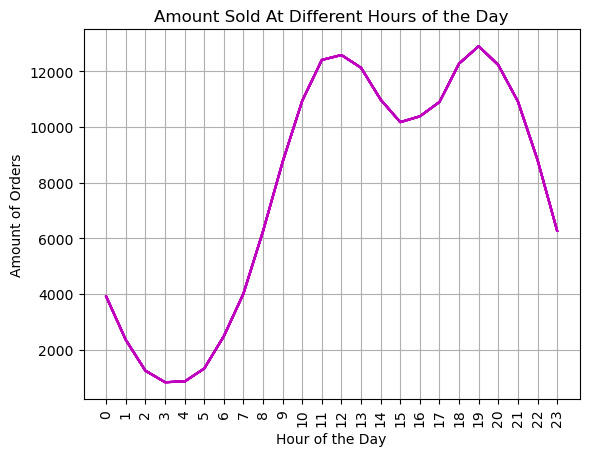

In [149]:
#Visualizing our data to make buisness predictions

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count(), color='m')
plt.xlabel('Hour of the Day')
plt.xticks(hours, rotation='vertical')
plt.ylabel('Amount of Orders')
plt.title('Amount Sold At Different Hours of the Day')
plt.grid()

plt.show()

Answer: According to the graph, hour 19 (7 PM) and 11 AM are the best times for products to be sold. At 7 PM, around 12,500 orderes were taken, and at 11 AM, around 12,200 orders were taken.

In [ ]:
QUESTION: What products are often sold togetherr?

In [160]:
#Spelling out all the duplicated items

df = all_data[all_data['Order ID'].duplicated(keep=False)]

#Creating a new column for grouped items

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(100)



/var/folders/9h/954tl1g160x3skhwsr60d5fc0000gn/T/ipykernel_2277/3121411849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2297,297847,"iPhone,Lightning Charging Cable"
2345,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable,27in FHD Monitor"
2398,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [166]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


QUESTION ANSWER: According to our data, and Iphone and a Lightning Charger Cable were sold the most often, because they were sold 1005 times. 

QUESTION: Which product was sold the most?

In [167]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity_Ordered,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,1,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,1,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,1,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,1,11.95,Atlanta (GA),12,38


/var/folders/9h/954tl1g160x3skhwsr60d5fc0000gn/T/ipykernel_2277/3793584043.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


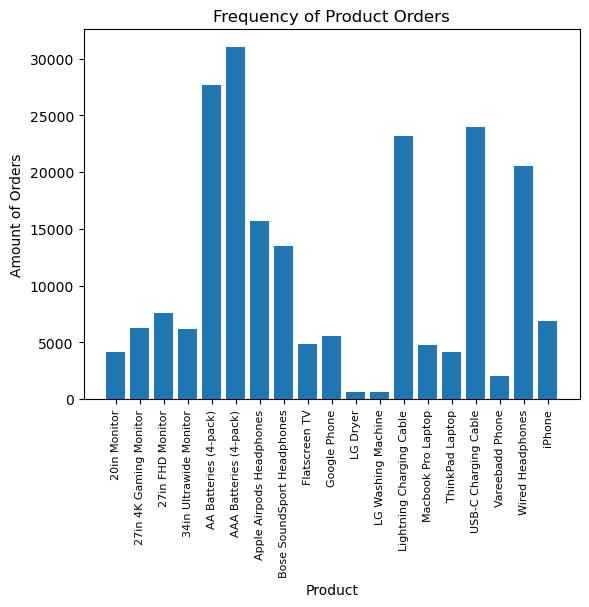

In [185]:
#Visualizing the data

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Amount of Orders')
plt.title('Frequency of Product Orders')
plt.show()

In [188]:
#Getting mean price of product

price = all_data.groupby('Product').mean()['Price Each']
print(price)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/var/folders/9h/954tl1g160x3skhwsr60d5fc0000gn/T/ipykernel_2277/1148663596.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price = all_data.groupby('Product').mean()['Price Each']


/var/folders/9h/954tl1g160x3skhwsr60d5fc0000gn/T/ipykernel_2277/3663945841.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price = all_data.groupby('Product').mean()['Price Each']
/var/folders/9h/954tl1g160x3skhwsr60d5fc0000gn/T/ipykernel_2277/3663945841.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


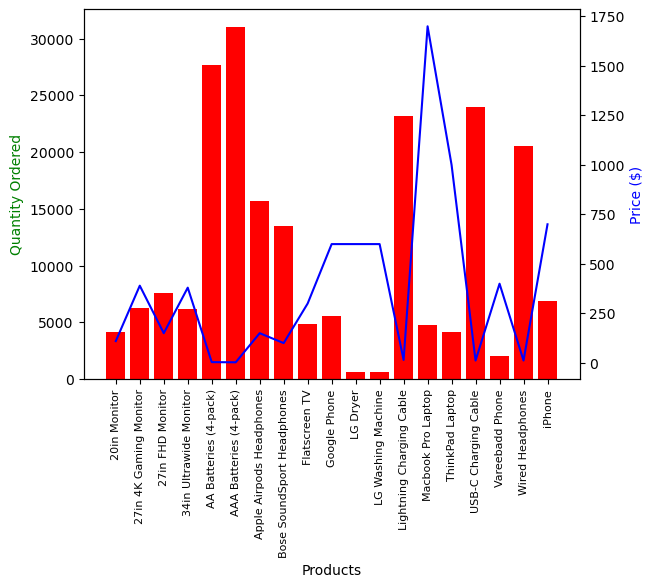

In [193]:
#Visualizing overlain y-axis

price = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='r')
ax2.plot(products, price, color='b')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

QUESTION ANSWER: AAA Batteries were the most sold product. This result makes sense, because almost any electric appliance or product needs batteries to operate.